In [1]:
import numpy as np
import pandas as pd


ModuleNotFoundError: No module named 'numpy'

In [3]:
sammple_hist = np.load(r"C:\Users\tskor\Documents\data\histograms\60_buckets_9_bands_60_res\60\Accomack_51\2017\5-6.npy")


In [3]:
d = {'m5':5, 'm6':6}

print('unsorted: ', d, 'sorted: ',  sorted(d))

unsorted:  {'m5': 5, 'm6': 6} sorted:  ['m5', 'm6']


In [16]:
x = sammple_hist.reshape((9,-1))

In [17]:
for i in range(2):
    print(x[i,:])

[   0    0    0    0    0    0    0   14  638 2325 4123 6452 7469 8516
 6163 4186 2190 1048  641  421  377  220  124   94   58   49   43   62
   52   35   29   17    8   14    4    3    3    3    5    4    3    0
    0    2    0    5    5    4    7   11    4    9    4    2    3    2
    0    3    1    2]
[   0    0    0    0    0    0    0    0    0  596 4350 6808 7708 9471
 7134 4728 2060  879  590  378  170   92   44   59   51   46   29   53
   69   29   12    5    6    5    5    2    1    2    5    2    4    2
    2    4    2    3    5    8    8    7    9    2    2    4    0    0
    3    2    2    0]


In [1]:
from datasets import load_dataset

dataset = load_dataset("imdb")

print(dataset)


False

In [25]:
import numpy as np
import os
INPUT_PATH = r'C:\Users\tskor\Documents\data\histograms\histograms_county_year'
HISTOGRAM_NAME = 'histogram-31035-2017.npy'

In [26]:
data_to_investigate = np.load(os.path.join(INPUT_PATH, HISTOGRAM_NAME), allow_pickle=True)

#### Test multimodal LSTM

In [56]:
# Add this at the beginning of your notebook
%load_ext autoreload
%autoreload 2  
# Automatically reload all modules before executing code

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import os
import sys
#  Add the root directory to the path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(root_dir)
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import numpy as np
from tensorflow.keras.optimizers import Adam

# Make sure eager execution is enabled
tf.config.run_functions_eagerly(False)
tf.data.experimental.enable_debug_mode()
tf.keras.config.disable_traceback_filtering()

In [58]:
#Dataset
from data.test_train_split import test_train_split_multi_modal
from models.lstm import LstmWeather, PreprocessingHead, Embeddings

WEATHER_PATH = r"C:\Users\tskor\Documents\data\WRF-HRRR\split_by_county_and_year\weather-combined.csv"
HISTOGRAM_PATH = r"C:\Users\tskor\Documents\data\histograms\histograms_county_year\histograms-combined.npy"
LABELS_PATH = r"C:\Users\tskor\Documents\GitHub\inovation_project\4_Data_Sample\combined_labels_with_fips.npy"

CAT_FEATURES = ["fips"]

In [71]:
labels_train.shape[0]/250

31.984

In [72]:
datasets_monthly_train, datasets_monthly_test = test_train_split_multi_modal(
    WEATHER_PATH,
    HISTOGRAM_PATH,
    LABELS_PATH,
    index=["fips", "year"],
    months=[5, 7, 9],
)
histograms_train, weather_train, labels_train = datasets_monthly_train
idx = 0

histogram data shape: (28734, 541)
weather data shape: (24501, 14)
common_index:  MultiIndex([('01001', 2017),
            ('01001', 2018),
            ('01001', 2019),
            ('01001', 2020),
            ('01003', 2017),
            ('01003', 2018),
            ('01003', 2019),
            ('01003', 2020),
            ('01003', 2021),
            ('01003', 2022),
            ...
            ('55139', 2019),
            ('55139', 2020),
            ('55139', 2021),
            ('55139', 2022),
            ('55141', 2017),
            ('55141', 2018),
            ('55141', 2019),
            ('55141', 2020),
            ('55141', 2021),
            ('55141', 2022)],
           names=['fips', 'year'], length=7996)


In [86]:
model = LstmWeather(weather_train,
histograms_train,
CAT_FEATURES,
lstm_units=7)

In [87]:
optimizer = Adam(learning_rate=0.0001)

In [88]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model((weather_train, histograms_train))

<tf.Tensor: shape=(7996, 1), dtype=float32, numpy=
array([[1.0464401],
       [0.9371204],
       [0.8571139],
       ...,
       [1.1591649],
       [1.0147954],
       [1.1749927]], dtype=float32)>

In [89]:
model.summary()

Model: "lstm_weather_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ preprocessing_head_68           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_69           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_70           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_71           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_72           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_73           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_66 (Embeddings)      │ ?                      │       493,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_67 (Embeddings)      │ ?                      │       493,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_68 (Embeddings)      │ ?                      │       493,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_69 (Embeddings)      │ ?                      │       628,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_70 (Embeddings)      │ ?                      │       628,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_71 (Embeddings)      │ ?                      │       628,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_181 (Concatenate)   │ (7996, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_182 (Concatenate)   │ (7996, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_183 (Concatenate)   │ (7996, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (7996, 7)              │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_305 (Dense)               │ (7996, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,370,524 (12.86 MB)

 Trainable params: 3,367,176 (12.84 MB)

 Non-trainable params: 3,348 (13.10 KB)

In [90]:
model.fit(x=(weather_train, histograms_train), y=labels_train, epochs=30, batch_size=16, validation_split=0.15, callbacks=[early_stopping])

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 141s 265ms/step - loss: 24769.7305 - mae: 152.5248 - val_loss: 15293.2754 - val_mae: 116.5833
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 106s 233ms/step - loss: 15779.7441 - mae: 119.7123 - val_loss: 7896.1519 - val_mae: 79.8345
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 101s 223ms/step - loss: 8944.1172 - mae: 87.5988 - val_loss: 3462.5281 - val_mae: 50.6184
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 229ms/step - loss: 3907.4202 - mae: 54.8708 - val_loss: 1415.0216 - val_mae: 31.1978
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 110s 242ms/step - loss: 1619.5745 - mae: 33.6061 - val_loss: 851.9500 - val_mae: 22.7512
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 106s 233ms/step - loss: 927.9886 - mae: 24.5210 - val_loss: 823.1934 - val_mae: 22.1802
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 103s 225ms/step - loss: 571.4622 - mae: 18.7344 - val_loss: 692.1841 - val_mae: 20.7604
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 102s 223ms/step - loss: 449.4788 - mae: 16.5247 -

In [78]:
histograms_test, weather_test, labels_test = datasets_monthly_test
model.evaluate(x=(weather_test, histograms_test), y=labels_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - loss: 475.4997


424.45513916015625

44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - loss: 220.7503 - mae: 11.2158
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step


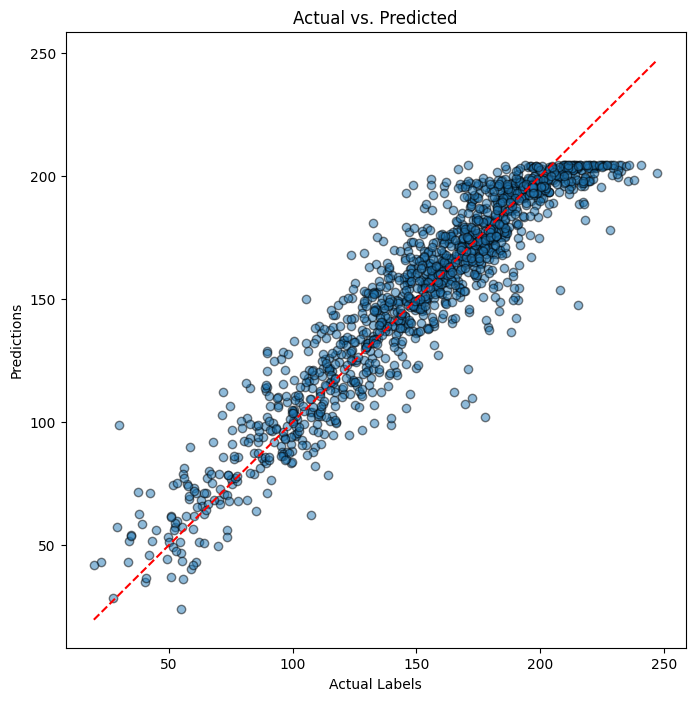

In [91]:
import matplotlib.pyplot as plt
mlp_eval = model.evaluate(x=(weather_test, histograms_test), y=labels_test)

# print(mlp_eval)
mlp_predictions_mmodal = model.predict(x=(weather_test, histograms_test))
actual_labels = labels_test

# Plot actual vs. predicted
plt.figure(figsize=(8, 8))
plt.scatter(actual_labels, mlp_predictions_mmodal, alpha=0.5, edgecolors='k')
plt.xlabel('Actual Labels')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted')
plt.plot([min(actual_labels), max(actual_labels)], [min(actual_labels), max(actual_labels)], 'r--')  # Line y=x for reference
plt.show()

In [92]:
from scipy import stats
mlp_corr, mlp_p = stats.pearsonr(actual_labels.flatten(), mlp_predictions_mmodal.flatten())

print("\nCorrelations using scipy.stats.pearsonr:")
print(f"MLP correlation: {mlp_corr:.3f} (p-value: {mlp_p:.3e})")


Correlations using scipy.stats.pearsonr:
MLP correlation: 0.936 (p-value: 0.000e+00)


In [85]:
model.summary()

Model: "lstm_weather_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ preprocessing_head_61           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_62           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_63           │ ?                      │            31 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_64           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_65           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing_head_66           │ ?                      │         1,085 │
│ (PreprocessingHead)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_60 (Embeddings)      │ ?                      │       493,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_61 (Embeddings)      │ ?                      │       493,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_62 (Embeddings)      │ ?                      │       493,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_63 (Embeddings)      │ ?                      │       627,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_64 (Embeddings)      │ ?                      │       627,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings_65 (Embeddings)      │ ?                      │       627,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_164 (Concatenate)   │ (7996, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_165 (Concatenate)   │ (7996, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_166 (Concatenate)   │ (7996, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (7996, 5)              │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (7996, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,096,208 (38.51 MB)

 Trainable params: 3,364,286 (12.83 MB)

 Non-trainable params: 3,348 (13.10 KB)

 Optimizer params: 6,728,574 (25.67 MB)

In [ ]:
# loss below treshold
low_yield_treshold = 100
low_yeild_mask = actual_labels < low_yield_treshold

low_yield_labels = actual_labels[low_yeild_mask]
mlp_low_predictions = mlp_predictions_mmodal[low_yeild_mask]


mlp_mse_low = sum((mlp_low_predictions - low_yield_labels)**2) / len(low_yield_labels)

low_yield_mlp_low_crop = sum(mlp_low_predictions < low_yield_treshold) / len(mlp_low_predictions)

print(f'LSTM+Weather MSE on low yield: {mlp_mse_low}')
print(f"MLP low yield crop, proportion of correctly predicted yields below the treshold: {low_yield_mlp_low_crop:.2%}")
